In [27]:
%load_ext autoreload
%autoreload 0
%matplotlib inline
import matplotlib.pylab as pl
import numpy as np
import scipy as sp
import sys
#tmp=sys.path.append('../Functions')
#import montage as mt
#import phantom as ph
import sympy as sy
from sympy.tensor import IndexedBase, Idx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
sy.init_printing()
f, m, S0, b, Diso, l = sy.symbols('f m S0 b Diso lambda')
g1, g2, g3, g4, g5, g6, g7 = sy.symbols('gamma1 gamma2 gamma3 gamma4 gamma5 gamma6 gamma7')
m, i, j = sy.symbols('m i j',Integer=True)
#W1, W2, W3, W4, W5, W6, W7 = IndexedBase('W1 W2 W3 W4 W5 W6 W7')
W1 = IndexedBase('Wone')
W2 = IndexedBase('Wtwo')
W3 = IndexedBase('Wthree')
W4 = IndexedBase('Wfour')
W5 = IndexedBase('Wfive')
W6 = IndexedBase('Wsix')
W7 = IndexedBase('Wseven')
#F = sy.symbols('F',cls=sy.Function)
W=IndexedBase('W')
g=IndexedBase('gamma')
S=IndexedBase('S')
#i, j = sy.symbols('i j', cls=Idx)

In [29]:
F=1/2*(S[i]-(1-f)*sy.exp(W[i,j]*g[j])-f*S0*sy.exp(-b*Diso))**2

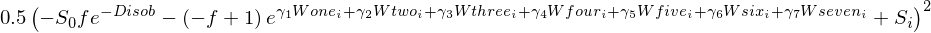

In [58]:
F

In [30]:
F.diff(f)

In [31]:
F=1/2*(S[i]-(1-f)*sy.exp(W1[i]*g1+W2[i]*g2+W3[i]*g3+W4[i]*g4+W5[i]*g5+W6[i]*g6+W7[i]*g7)-f*S0*sy.exp(-b*Diso))**2

In [32]:
F.diff(g7)

In [55]:
F_mat=sy.Matrix([F])

In [56]:
F_jac=F_mat.jacobian((f,g1,g2,g3,g4,g5,g6,g7))

In [57]:
F_jac

In [36]:
F_hess=F_jac.T.jacobian((f,g1,g2,g3,g4,g5,g6,g7)).T

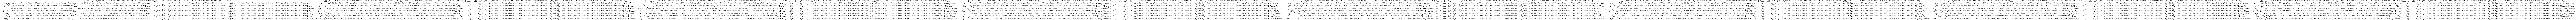

In [37]:
F_hess

In [38]:
#delta=-(F_hess+l*sy.eye(8)).inv()*F_jac

In [39]:
type(l)

sympy.core.symbol.Symbol

In [40]:
l

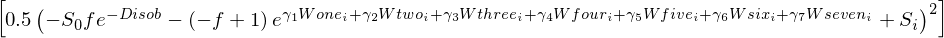

In [41]:
F_mat

In [42]:
F_sum=sy.summation(F,(i,1,m))

In [43]:
F_mat=sy.Matrix([F_sum])

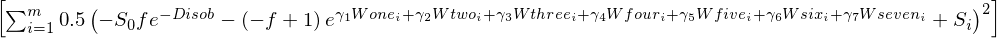

In [44]:
F_mat

In [45]:
F_jac=F_mat.jacobian((f,g1,g2,g3,g4,g5,g6,g7))

In [46]:
F_jac

In [47]:
F_hess=F_jac.T.jacobian((f,g1,g2,g3,g4,g5,g6,g7)).T

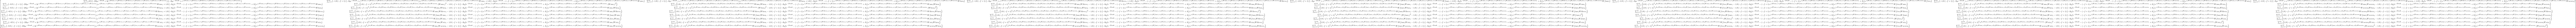

In [48]:
F_hess

In [49]:
#F_sum=1/2*(S[i]-(1-f)*sy.exp(W[i,j]*g[j])-f*S0*sy.exp(-b*Diso))**2

In [50]:
#sy.summation(F_sum,(i,1,7))